# Unit test for staNMF

In [1]:
from staNMF import instability
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [14]:
n, d, K = 100, 100, 10
D = np.maximum(np.random.normal(size = (n, K)),0)
A = np.maximum(np.random.normal(size = (K, d)),0)
X = D @ A + np.random.normal(0, 1, size = (n,d))
mask = np.random.choice([0, 1], p=[.9, .1], size = (n, d))
masked_X = X - 1000 * mask 

In [15]:
ins = instability(masked_X.T, n_trials=10, folder_name='tmp', random_state=1000)

In [16]:
Ks = list(range(6, 15))
output = ins.fit_transform(Ks, parallel = False)
output

array([[6.59811936e-06, 3.41311095e-06],
       [6.14379139e-02, 2.88925242e-02],
       [2.85061067e-02, 1.72123147e-02],
       [6.38889809e-02, 2.64628647e-02],
       [5.96868178e-07, 1.50359658e-07],
       [4.90581220e-02, 6.50798092e-03],
       [7.35508828e-02, 1.18815871e-02],
       [9.36954298e-02, 1.28074815e-02],
       [1.25127154e-01, 1.06206351e-02]])

Text(0.5, 1.0, 'instability for different Ks')

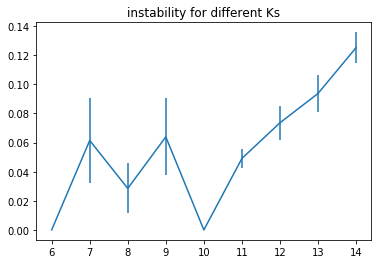

In [17]:
plt.errorbar(x = Ks, y = output[:,0], yerr=output[:,1])
plt.title('instability for different Ks')

## test parallel

In [13]:
%timeit ins.fit(Ks, parallel = True, processes = len(Ks))

4.19 s ± 79.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit ins.fit(Ks, parallel = False)

6.67 s ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
